In [1]:
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
def generate_confusion_matrix(df):
    return confusion_matrix(df['condition'], df['pred'], labels=['COVID-19', 'pneumonia', 'normal'])

In [3]:
def generate_confusion_matrix_image(df):
    m = generate_confusion_matrix(df)
    disp = ConfusionMatrixDisplay(confusion_matrix=m,
                              display_labels=['COVID-19', 'Non-COVID-19 Pneumonia', 'No Pneumonia'])
    disp = disp.plot(include_values=True,
                     cmap=plt.cm.Blues, ax=None, xticks_rotation='vertical', values_format='d')
    plt.show()

In [4]:
def generate_kpis(df):
    m = generate_confusion_matrix(df)
    print("Accuracy: {}\n".format((m[0,0] + m[1,1] + m[2,2]) / m.sum()))
    print("COVID-19 Sensitivity: {}".format(m[0,0] / (m[0].sum())))
    print("Pneumonia Sensitivity: {}".format(m[1,1] / (m[1].sum())))
    print("Normal Sensitivity: {}\n".format(m[2,2] / (m[2].sum())))
    print("COVID-19 PPV: {}".format(m[0,0] / (m[0,0] + m[1,0] + m[2,0])))
    print("Pneumonia PPV: {}".format(m[1,1] / (m[0,1] + m[1,1] + m[2,1])))
    print("Normal PPV: {}".format(m[2,2] / (m[0,2] + m[1,2] + m[2,2])))

In [5]:
df_480_ehl_total = pd.read_csv('/p/project/joaiml/ingolfsson1/COVID_Net/results/total_ehl_480_1636665405.csv')

#### Total EHL dataset

In [6]:
generate_confusion_matrix(df_480_ehl_total)

array([[ 274,   12,    3],
       [ 118,    0,    0],
       [1866,    0,   32]])

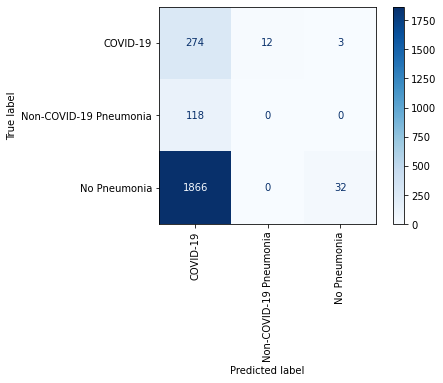

In [7]:
generate_confusion_matrix_image(df_480_ehl_total)

In [29]:
generate_kpis(df_480_ehl_total)

Accuracy: 0.13275488069414318

COVID-19 Sensitivity: 0.9480968858131488
Pneumonia Sensitivity: 0.0
Normal Sensitivity: 0.01685985247629083

COVID-19 PPV: 0.12134632418069087
Pneumonia PPV: 0.0
Normal PPV: 0.9142857142857143


In [8]:
df_224_ehl_total = pd.read_csv('/p/project/joaiml/ingolfsson1/COVID_Net/results/total_ehl_224_1636752096.csv')

In [9]:
generate_confusion_matrix(df_224_ehl_total)

array([[251,  17,  21],
       [ 72,  14,  32],
       [856, 101, 941]])

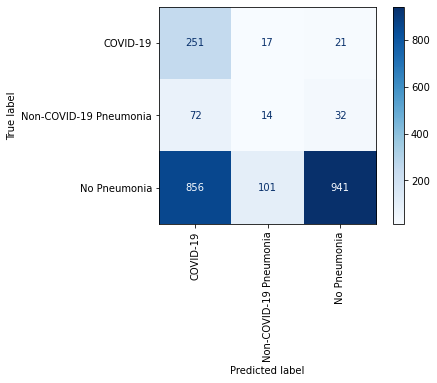

In [10]:
generate_confusion_matrix_image(df_224_ehl_total)

In [12]:
generate_kpis(df_224_ehl_total)

Accuracy: 0.5232104121475054

COVID-19 Sensitivity: 0.8685121107266436
Pneumonia Sensitivity: 0.11864406779661017
Normal Sensitivity: 0.4957850368809273

COVID-19 PPV: 0.21289228159457166
Pneumonia PPV: 0.10606060606060606
Normal PPV: 0.9466800804828974


#### After removing duplicate images

In [23]:
duplicates = pd.read_csv('/p/project/joaiml/ingolfsson1/COVID_Net/duplicate_images_ehl.csv', sep=';')['name'].to_numpy()

In [25]:
df_480_ehl_edited = df_480_ehl_total[~df_480_ehl_total['path'].isin(duplicates)].copy()

In [27]:
generate_confusion_matrix(df_480_ehl_edited)

array([[ 173,   11,    3],
       [ 118,    0,    0],
       [1866,    0,   32]])

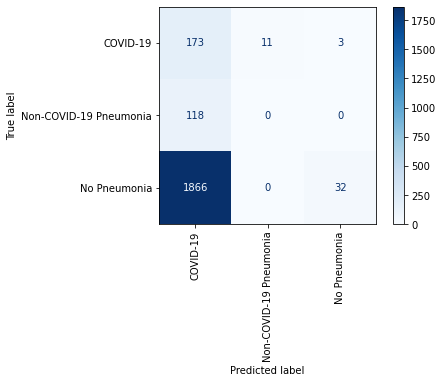

In [28]:
generate_confusion_matrix_image(df_480_ehl_edited)

In [30]:
generate_kpis(df_480_ehl_edited)

Accuracy: 0.09305492510213345

COVID-19 Sensitivity: 0.9251336898395722
Pneumonia Sensitivity: 0.0
Normal Sensitivity: 0.01685985247629083

COVID-19 PPV: 0.08020398701900788
Pneumonia PPV: 0.0
Normal PPV: 0.9142857142857143


In [31]:
df_224_ehl_edited = df_224_ehl_total[~df_224_ehl_total['path'].isin(duplicates)].copy()

In [32]:
generate_confusion_matrix(df_224_ehl_edited)

array([[149,  17,  21],
       [ 72,  14,  32],
       [856, 101, 941]])

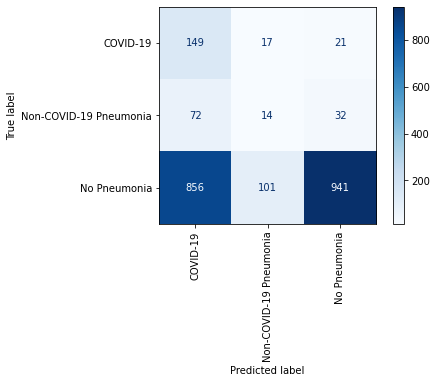

In [33]:
generate_confusion_matrix_image(df_224_ehl_edited)

In [34]:
generate_kpis(df_224_ehl_edited)

Accuracy: 0.5011348161597822

COVID-19 Sensitivity: 0.7967914438502673
Pneumonia Sensitivity: 0.11864406779661017
Normal Sensitivity: 0.4957850368809273

COVID-19 PPV: 0.13834726090993502
Pneumonia PPV: 0.10606060606060606
Normal PPV: 0.9466800804828974
